### Самая простая конфигурация

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('import/train.csv') # загружаем тренировочный датасет в датафрейм df_train
df_test = pd.read_csv('import/test.csv') # загружаем тестовый датасет в датафрейм df_test

In [3]:
X = df_train.drop(['Price','Id'], axis=1)
y = df_train[['Price']]

In [6]:
# Заменяем в наблюдениях по признаку Shops_2  буквы A и B на цифры 0 и 1
Shops_2_map = {
    "B": 1,
    "A": 0,
}

X["Shops_2"] = X["Shops_2"].map(Shops_2_map) 

# Заменяем в наблюдениях по признаку Ecology_2  буквы A и B на цифры 0 и 1
Ecology_2_map = {
    "B": 1,
    "A": 0,
}

X["Ecology_2"] = X["Ecology_2"].map(Ecology_2_map)

# Заменяем в наблюдениях по признаку Ecology_3  буквы A и B на цифры 0 и 1
Ecology_3_map = {
    "B": 1,
    "A": 0,
}

X["Ecology_3"] = X["Ecology_3"].map(Ecology_3_map)

In [8]:
X.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [10]:
lifeSquare_mean = X['LifeSquare'].mean()
healthcare_1_median = X['LifeSquare'].median()

In [11]:
X["LifeSquare"].fillna(lifeSquare_mean, inplace=True)
X["Healthcare_1"].fillna(healthcare_1_median, inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=51)

### LR

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_valid)

In [17]:
check_test = pd.DataFrame({
    "y_valid": y_valid["Price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_valid,y_pred
3465,189266.166676,217938.531469
2574,218538.048237,225442.872866
2223,170842.817332,131037.901714
4520,335590.276988,311979.243955
9998,181595.339808,206290.959144
79,184737.921069,163890.487253
4591,115371.161036,177462.295111
4459,201723.046732,161931.813391
9614,215228.127495,232355.742773
6279,171739.199220,218732.768139


In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_first = r2_score(y_valid, y_pred) # чем ближе к единице, тем лучше предсказание
r2_first

0.5266190338992335

### KNN

In [20]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

In [22]:
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_valid)

In [24]:
print("R^2 на тренировочной выборке: {}".format(r2_score(y_train, y_pred_train)))
print("R^2 на тестовой выборке: {}".format(r2_score(y_valid, y_pred)))

R^2 на тренировочной выборке: 0.8321042455844349
R^2 на тестовой выборке: 0.6154631965321261


### RandomForestRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=51).fit(X_train, y_train)

<ipython-input-25-2578a3a363e2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=51).fit(X_train, y_train)


In [26]:
y_pred_train = regr.predict(X_train)
y_pred = regr.predict(X_valid)

In [27]:
print("R^2 на тренировочной выборке: {}".format(r2_score(y_train, y_pred_train)))
print("R^2 на тестовой выборке: {}".format(r2_score(y_valid, y_pred)))

R^2 на тренировочной выборке: 0.8434059606300407
R^2 на тестовой выборке: 0.6956575147335594


### Gradient Boosting Regressor

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(random_state=51, n_estimators=322).fit(X_train, y_train)

/home/ishubenko/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [64]:
y_pred_train = gbt.predict(X_train)
y_pred = gbt.predict(X_valid)

In [31]:
print("R^2 на тренировочной выборке: {}".format(r2_score(y_train, y_pred_train)))
print("R^2 на тестовой выборке: {}".format(r2_score(y_valid, y_pred)))

R^2 на тренировочной выборке: 0.8383605664003575
R^2 на тестовой выборке: 0.7272582879244531


### TEST

In [34]:
X_test = df_test
X_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


In [35]:
Shops_2_map = {
    "B": 1,
    "A": 0,
}

X_test["Shops_2"] = X_test["Shops_2"].map(Shops_2_map) 

# Заменяем в наблюдениях по признаку Ecology_2  буквы A и B на цифры 0 и 1
Ecology_2_map = {
    "B": 1,
    "A": 0,
}

X_test["Ecology_2"] = X_test["Ecology_2"].map(Ecology_2_map)

# Заменяем в наблюдениях по признаку Ecology_3  буквы A и B на цифры 0 и 1
Ecology_3_map = {
    "B": 1,
    "A": 0,
}

X_test["Ecology_3"] = X_test["Ecology_3"].map(Ecology_3_map)

In [36]:
test_lifeSquare_mean = X_test['LifeSquare'].mean()
test_healthcare_1_median = X_test['LifeSquare'].median()

In [37]:
X_test["LifeSquare"].fillna(test_lifeSquare_mean, inplace=True)
X_test["Healthcare_1"].fillna(test_healthcare_1_median, inplace=True)

In [41]:
X_test = X_test.drop('Id', axis=1)

In [42]:
y_pred = gbt.predict(X_test)

In [43]:
predictions = pd.DataFrame(index = df_test['Id'])
predictions['Price'] = y_pred
predictions

,Price
Id,
725,157218.957191
15856,177603.244215
5480,245623.095805
15664,388781.261774
14275,134790.318445
...,...
8180,229883.555323
4695,131671.293821
5783,322479.067104


In [44]:
predictions.to_csv('try_test_6.csv', sep=',')

In [53]:
m = gbt.feature_importances_
m

array([6.06113878e-02, 3.52160620e-02, 4.55707406e-01, 1.14447403e-02,
       2.55108360e-02, 1.21564318e-02, 1.53192264e-02, 3.35071504e-02,
       4.34617805e-02, 2.42204288e-04, 6.25076120e-05, 9.93364389e-02,
       7.46980756e-02, 9.28058059e-02, 2.44515587e-02, 3.74037264e-03,
       1.11727162e-02, 5.55299311e-04])

In [49]:
features= X.keys()

In [46]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

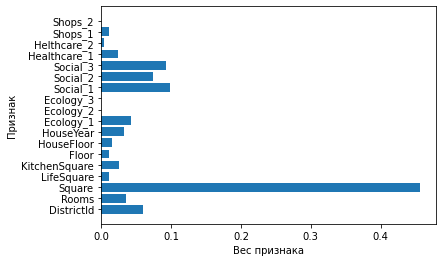

In [52]:
plt.barh(features, m)

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [54]:
def create_model(X_train, y_train, X_valid, y_valid, features, model):
    model.fit(X_train.loc[:, features], y_train)
    y_pred = model.predict(X_valid.loc[:, features])
    r2_train = r2_score(y_train, y_pred_train)
    r2_valid = r2_score(y_valid, y_pred)
    return print('r2_train = ',r2_train, '\nr2_valid = ',r2_valid)

In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=52)

In [57]:
gbt = GradientBoostingRegressor(random_state=52, n_estimators=322).fit(X_train, y_train)

/home/ishubenko/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [65]:
create_model(X_train, y_train, X_valid, y_valid, features, gbt)

/home/ishubenko/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2_train =  0.8379102232328214 
r2_valid =  0.748551195274805


In [66]:
y_pred = gbt.predict(X_test)

In [67]:
predictions = pd.DataFrame(index = df_test['Id'])
predictions['Price'] = y_pred
predictions

,Price
Id,
725,160322.521466
15856,211199.215320
5480,161662.837550
15664,337257.248935
14275,136202.089514
...,...
8180,221047.350240
4695,135949.867925
5783,320673.560900


In [68]:
predictions.to_csv('try_test_7.csv', sep=',')

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,32.78126,0,11,1
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.00000,1,16,1
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.00000,1,3,1
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.00000,0,5,1
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.00000,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.00000,3,11,1
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,32.78126,0,5,0
9997,27,1.0,47.939008,37.199645,1.0,12,16.0,2015,0.072158,1,1,2,629,1,32.78126,0,0,0
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.00000,2,5,1


In [80]:
#X[['DistrictId', 'Square', 'Social_1', 'Social_2', 'Social_3']].describe()
X.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,610.267349,1.319500,4.231300,0.917500
std,43.587592,0.839512,21.058732,76.588742,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,922.170603,1.493601,4.806341,0.275139
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,32.781260,0.000000,1.000000,1.000000
50%,36.000000,2.000000,52.513310,37.199645,6.000000,7.000000,13.000000,1.977000e+03,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,32.781260,1.000000,3.000000,1.000000
75%,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000


In [79]:
#X_test[['DistrictId', 'Square', 'Social_1', 'Social_2', 'Social_3']].describe()
X_test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,617.188986,1.31940,4.242800,0.917600
std,44.179466,0.838594,19.092787,15.861084,9.950018,5.483228,6.789213,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,939.097015,1.47994,4.777365,0.275001
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,21.000000,1.000000,41.906231,25.850152,1.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,32.925087,0.00000,1.000000,1.000000
50%,37.000000,2.000000,52.921340,36.158810,6.000000,7.000000,12.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,32.925087,1.00000,3.000000,1.000000
75%,77.000000,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000
max,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000


In [92]:
#def square_gen_new_feat(X):
df_train[['Square', 'Price', 'LifeSquare']].loc[(X['Square'] < 25)]

,Square,Price,LifeSquare
212,5.497061,412511.088764,67.628717
1316,4.633498,107604.269441,1.969969
1476,23.583220,108232.647619,18.442768
1608,2.596351,137597.601458,4.604943
1891,17.498542,88871.750230,13.446544
3084,20.213128,113050.229914,13.800281
3166,17.046188,74222.110465,20.036232
3280,4.380726,97560.720383,40.805837
3413,5.129222,369472.403061,5.549458
3794,18.509177,115845.861527,15.170851


In [93]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [103]:
df_train[['Square', 'Price', 'LifeSquare']].loc[(df_train['Price'] < 90000) & (df_train['Square'] > 60)]

,Square,Price,LifeSquare
15,73.612225,89084.327876,53.892089
221,67.871545,89269.188169,35.335792
346,63.992379,87629.084526,37.723687
432,63.676821,88967.921797,45.146101
696,94.417148,71057.273346,56.749169
991,83.664753,86902.578889,51.041951
1606,78.188447,84808.029433,44.663408
1770,60.891006,85622.932722,36.969900
1884,61.342410,67343.133878,33.767600
2410,61.464284,72430.588440,30.289514


In [101]:
y.loc[(y['Price'] > 400000)]

,Price
20,521919.057400
23,571069.052600
35,402871.916317
44,435462.048070
86,510700.444735
...,...
9837,425837.404955
9858,476299.200577
9910,528560.506016
9918,411971.106869
